# Explore here

In [3]:
# Your code 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import joblib


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')
print(df.shape)
df.head().T

(41188, 21)


,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


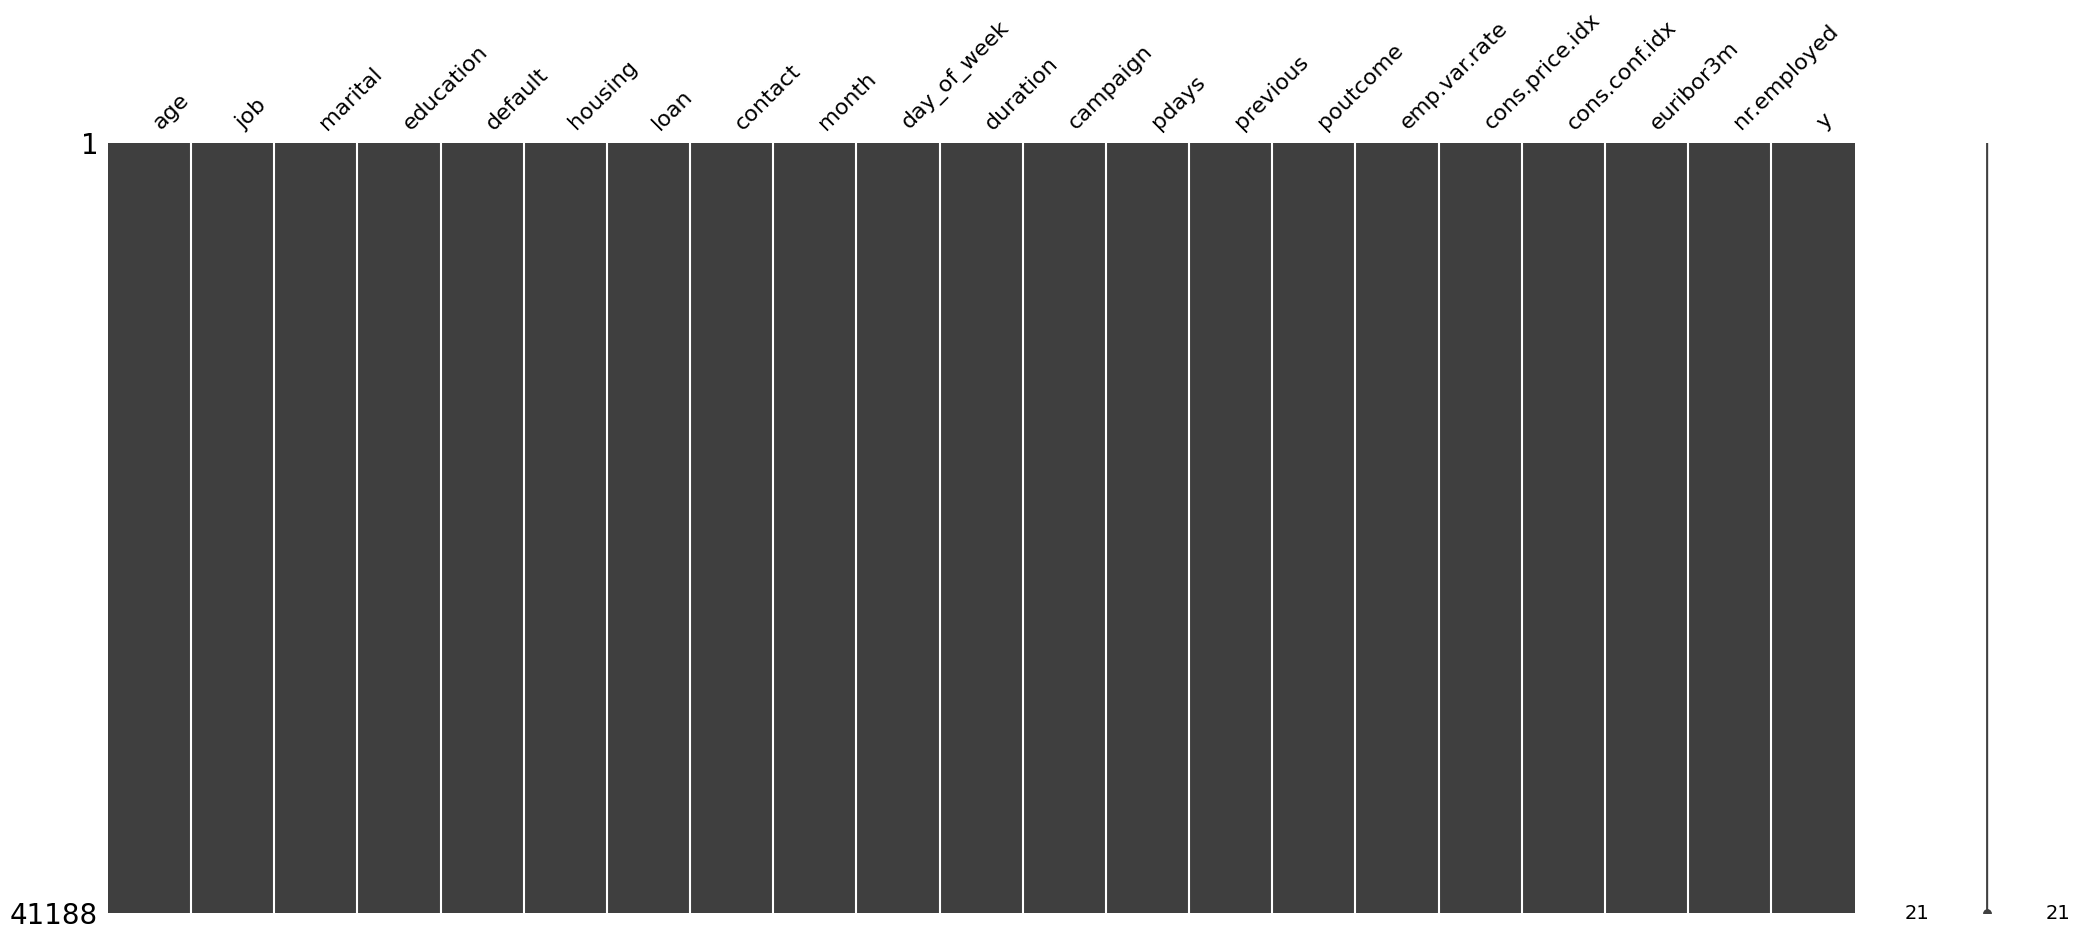

In [5]:
print(df.isnull().sum())
msno.matrix(df)  # Visualiza los valores nulos en el dataset
plt.show()

In [6]:
# Eliminar duplicados
df = df.drop_duplicates()

In [7]:
# Eliminar columnas irrelevantes
#df.drop(["default", "day_of_week", "month", "poutcome", "education", "housing", "loan","duration"], axis=1, inplace=True)

In [8]:
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [9]:
print(df.nunique())


age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


In [10]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [11]:
print(df['job'].nunique())
print(df['marital'].nunique())
print(df['contact'].nunique())
print(df['y'].nunique())

12
4
2
2


In [12]:
# Creo una función para pasar los valores categoricos a númericos.

def encode_categorical_columns(df):
    #hago una copia para no modificar los datos del df
    df_encoded = df.copy() 
  

    #recorremos todas las columnas para encontrar las que son de tipo object y category
    for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
        # Creo un label encoder para cada columna
        vlable_encoder = LabelEncoder()
        # reemplazamos los vlaores categoricos a númericos
        df_encoded[col] = vlable_encoder.fit_transform(df_encoded[col])
        
   
    return df_encoded

# Guardamos los resultados

df_encoded = encode_categorical_columns(df)

In [13]:
df_encoded.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [14]:
X = df_encoded.drop(columns=['y'], axis= 1)
y = df_encoded['y']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [15]:
# Normalización de datos numéricos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
#X_train_scaled.corr()

In [17]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()

modelo.fit(X_train_scaled,y_train)

LogisticRegression()

In [18]:
# GridSearchCV para optimización de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

In [19]:
y_pred = modelo.predict(X_test_scaled)
y_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(8236,))

In [20]:
# Evaluación del modelo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7265
           1       0.66      0.37      0.47       971

    accuracy                           0.90      8236
   macro avg       0.79      0.67      0.71      8236
weighted avg       0.89      0.90      0.89      8236



In [ ]:
# Tenemos un buen dato en

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9028654686741137

In [22]:
# Probar modelo XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7265
           1       0.64      0.53      0.58       971

    accuracy                           0.91      8236
   macro avg       0.79      0.75      0.77      8236
weighted avg       0.90      0.91      0.91      8236



In [ ]:
#Precisión global: 91% 
#Mejor recall en la clase 1 clientes que sí contratan el depósito: 53% antes era solo 37%.
#F1-score en la clase 1: 58% mejor que el 47% anterior.
#Ahora el modelo tiene un mejor equilibrio entre precisión y recall para la clase 1, lo que significa que está capturando más clientes potenciales.

In [23]:
accuracy_score(y_test, y_pred_xgb)

0.9102719766877125